In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
# pd.set_option('display.max_rows', 15)

In [42]:
dfMS = pd.read_csv('/home/davi/Documents/Python/Covid-19-Data/HIST_PAINEL_COVIDBR_11ago2020(1).csv',low_memory=False)
dfMS

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/2/2020,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/2/2020,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/2/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/2/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/2/2020,9,210147125,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772145,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,7/8/2020,32,3015268,119903,1903,1682,31,NaN,NaN,1.0
772146,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,8/8/2020,32,3015268,121824,1921,1712,30,NaN,NaN,1.0
772147,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,9/8/2020,33,3015268,123057,1233,1731,19,NaN,NaN,1.0
772148,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,10/8/2020,33,3015268,126069,3012,1762,31,NaN,NaN,1.0


In [ ]:
dfMS = dfMS.loc[:,['data','estado','municipio','populacaoTCU2019','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
dfMS['data'] = pd.to_datetime(dfMS['data'])
dfMS['data'] = dfMS['data'].dt.strftime("%d-%m-%Y")
dfMS = dfMS.dropna()
dfMS

In [ ]:
dfMS['data'].max()

In [38]:
dfEstado = dfMS['estado'].astype(str).unique()
dfEstado

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [39]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
4977,2020-12-07,RO,Alta Floresta D'Oeste,22945,155,3,0,0
5115,2020-12-07,RO,Ariquemes,107863,1702,80,27,2
5253,2020-12-07,RO,Cabixi,5312,20,1,2,0
5391,2020-12-07,RO,Cacoal,85359,398,10,5,0
5529,2020-12-07,RO,Cerejeiras,16323,43,5,3,0
...,...,...,...,...,...,...,...,...
771567,2020-12-07,GO,Vianópolis,13863,63,0,0,0
771705,2020-12-07,GO,Vicentinópolis,8743,3,0,1,0
771843,2020-12-07,GO,Vila Boa,6171,6,0,0,0
771981,2020-12-07,GO,Vila Propício,5821,9,0,1,0


In [29]:
sumCases = dfMS.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [10]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,estado,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Other_States,52521369,1306705,1710843,36523
1,SP,27078122,639420,1368878,25571
2,BA,7105612,195603,171377,4043
3,CE,9624174,188720,509906,8011
4,RJ,9683917,182563,853989,14212
5,PA,8571601,169613,400372,5901
6,MG,5106846,156038,113514,3571
7,MA,6871655,132060,178421,3204
8,DF,4683598,127484,63150,1815


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e64ceae48>,
      dtype=object)

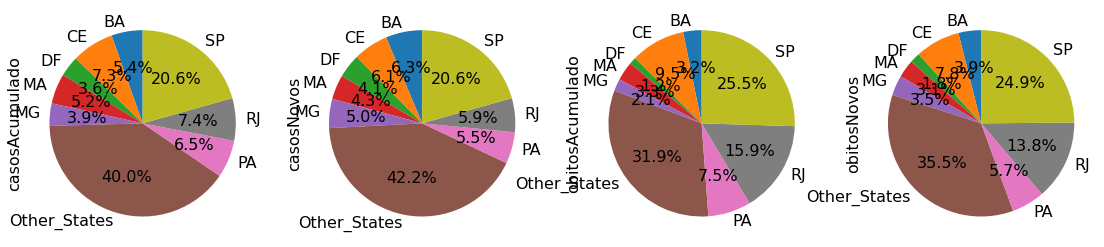

In [11]:
sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [12]:
dfSP = dfToday[(dfToday['estado'] == 'SP') & (dfToday['casosNovos'] > 100)]
dfSP = dfSP.sort_values(by=['casosNovos'], ascending=False)
dfSP

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
534759,2020-12-07,SP,São Paulo,12252023,152806,1441,8212,36
532275,2020-12-07,SP,São Bernardo do Campo,838936,10549,165,498,15
472245,2020-12-07,SP,Campinas,1204073,11513,146,453,7
478317,2020-12-07,SP,Diadema,423884,4089,136,210,0
533931,2020-12-07,SP,São José do Rio Preto,460671,4417,136,130,6
534069,2020-12-07,SP,São José dos Campos,721944,4195,128,116,0
517095,2020-12-07,SP,Piracicaba,404142,3990,118,121,2
537381,2020-12-07,SP,Sorocaba,679378,6363,116,162,0


In [13]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df['last_available_date'] = pd.to_datetime(df['last_available_date'])
df = df.dropna()
df

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0000,0,4,city,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0000,0,5,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515494,Tocantínia,1721109.0,2020-08-10,33,7545.0,False,True,256,3392.97548,2020-08-08,0.0156,4,84,city,TO,0,0
515495,Tupirama,1721257.0,2020-08-10,33,1891.0,False,True,23,1216.28768,2020-08-08,0.0435,1,80,city,TO,0,0
515496,Tupiratins,1721307.0,2020-08-10,33,2671.0,False,True,6,224.63497,2020-08-08,0.0000,0,80,city,TO,0,0
515497,Wanderlândia,1722081.0,2020-08-10,33,11683.0,False,True,182,1557.81905,2020-08-08,0.0275,5,105,city,TO,0,0


In [14]:
df = df.loc[:,['date', 'last_available_date', 'state', 'city', 'last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths']]
# df = df[df['last_available_date'] == df['last_available_date'].max()]
df

,date,last_available_date,state,city,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
0,2020-02-25,2020-02-25,SP,São Paulo,1,0,1,0
2,2020-02-26,2020-02-26,SP,São Paulo,1,0,0,0
4,2020-02-27,2020-02-27,SP,São Paulo,1,0,0,0
6,2020-02-28,2020-02-28,SP,São Paulo,2,0,1,0
8,2020-02-29,2020-02-29,SP,São Paulo,2,0,0,0
...,...,...,...,...,...,...,...,...
515494,2020-08-10,2020-08-08,TO,Tocantínia,256,4,0,0
515495,2020-08-10,2020-08-08,TO,Tupirama,23,1,0,0
515496,2020-08-10,2020-08-08,TO,Tupiratins,6,0,0,0
515497,2020-08-10,2020-08-08,TO,Wanderlândia,182,5,0,0


In [15]:
sumCases = df.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [16]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,state,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
0,Other_States,55472434,1735996,1382022,37340
1,SP,26365058,1341647,598609,24447
2,BA,6824892,167283,190705,3987
3,CE,9468650,503387,187207,7992
4,RJ,9503198,839821,180025,14109
5,PA,8536457,398366,169618,5900
6,MG,4925252,109504,154641,3556
7,MA,6788186,176425,130576,3187


In [17]:
dfToday = df[df['last_available_date'] == df['last_available_date'].max()]
dfToday

,date,last_available_date,state,city,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
510000,2020-08-10,2020-08-10,AL,Anadia,422,6,1,0
510001,2020-08-10,2020-08-10,AL,Arapiraca,8920,119,410,2
510002,2020-08-10,2020-08-10,AL,Atalaia,522,16,0,0
510003,2020-08-10,2020-08-10,AL,Barra de Santo Antônio,118,8,0,0
510004,2020-08-10,2020-08-10,AL,Barra de São Miguel,123,5,0,0
...,...,...,...,...,...,...,...,...
514637,2020-08-10,2020-08-10,SC,Zortéa,192,1,3,0
514638,2020-08-10,2020-08-10,SC,Água Doce,30,0,0,0
514639,2020-08-10,2020-08-10,SC,Águas Frias,12,0,0,0
514640,2020-08-10,2020-08-10,SC,Águas Mornas,79,1,0,0


In [18]:
dfSP = dfToday[(dfToday['state'] == 'SC') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

,date,last_available_date,state,city,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths


In [19]:
dfSelect = df.loc[:,['date', 'last_available_date', 'state', 'city', 'last_available_deaths', 'new_confirmed', 'new_deaths']]
dfSelect = dfSelect[dfSelect['last_available_date'] >= (df['last_available_date'].max() - pd.to_timedelta('1days'))]
dfSelect

,date,last_available_date,state,city,last_available_deaths,new_confirmed,new_deaths
504431,2020-08-09,2020-08-09,AC,Acrelândia,7,5,0
504432,2020-08-09,2020-08-09,AC,Assis Brasil,8,3,0
504433,2020-08-09,2020-08-09,AC,Brasiléia,12,26,0
504434,2020-08-09,2020-08-09,AC,Bujari,6,5,1
504435,2020-08-09,2020-08-09,AC,Capixaba,7,2,0
...,...,...,...,...,...,...,...
514712,2020-08-10,2020-08-09,SE,São Miguel do Aleixo,2,0,0
514713,2020-08-10,2020-08-09,SE,Telha,2,0,0
514714,2020-08-10,2020-08-09,SE,Tobias Barreto,29,0,0
514715,2020-08-10,2020-08-09,SE,Tomar do Geru,7,0,0


In [20]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [21]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,state,last_available_deaths,new_confirmed,new_deaths
0,Other_States,137629,35342,1023


In [22]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['last_available_deaths'] > 100)]
dfSP = dfSP.sort_values(by=['last_available_deaths'], ascending=False)
dfSP

,date,last_available_date,state,city,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
